### **图像卷积**

cv.filter2D()不会将卷积模板旋转，如果卷积模板不是中心对称，需要现将其旋转180度再输入该函数

In [15]:
# -*- coding:utf-8 -*-
import cv2 as cv
import numpy as np
import sys
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
# 设置中文字体
matplotlib.rcParams['font.family'] = 'simhei'
matplotlib.rcParams['axes.unicode_minus'] = False
rootpath = '/home/zomnk/python_ws/02-OpenCV4/images/'

In [ ]:
# 以矩阵为例
src = np.array([[1, 2, 3, 4, 5], [6, 7, 8, 9, 10], [11, 12, 13, 14, 15], [16, 17, 18, 19, 20], [21, 22, 23, 24, 25]], dtype='float32')
kernel1 = np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]], dtype='float32') / 9
# 默认外推法为cv.BORDER_DEFAULT，表示不含边界值的倒序填充
# 边缘位置的计算需要使用外推的像素值，但其不能反映图像像素值的变化情况
# 因此卷积后图像边缘处的信息可能会出现巨大的改变，如果边缘处有比较重要的信息，可以适当减小模板的尺寸
result = cv.filter2D(src, -1, kernel=kernel1, borderType=cv.BORDER_DEFAULT) 
print('卷积前矩阵为：\n{}'.format(src))
print('卷积后矩阵为：\n{}'.format(result))

卷积前矩阵为：
[[ 1.  2.  3.  4.  5.]
 [ 6.  7.  8.  9. 10.]
 [11. 12. 13. 14. 15.]
 [16. 17. 18. 19. 20.]
 [21. 22. 23. 24. 25.]]
卷积后矩阵为：
[[ 5.         5.3333335  6.3333335  7.333333   7.666667 ]
 [ 6.666667   7.         8.         9.         9.333333 ]
 [11.666668  12.        13.        13.999999  14.333334 ]
 [16.666666  17.        17.999998  19.        19.333332 ]
 [18.333334  18.666666  19.666668  20.666668  21.       ]]


In [17]:
# 以图像为例
# 读取图像并判断是否读取成功
img = cv.imread(rootpath +'lena.jpg')[:, :, [2, 1, 0]]
if img is None:
    print('Failed to read lena.jpg')
    sys.exit

In [18]:
kernel2 = np.ones((7, 7), np.float32) / 49
result2 = cv.filter2D(img, -1, kernel=kernel2)

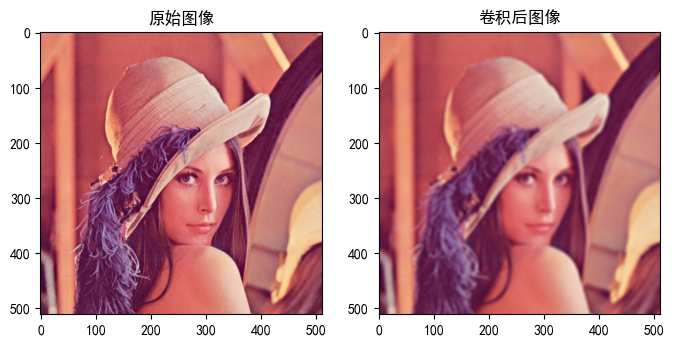

In [19]:
# 展示结果
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.title('原始图像')
plt.imshow(img)
plt.subplot(1, 2, 2)
plt.title('卷积后图像')
plt.imshow(result2)

卷积前后图像内容一致，但是图像整体变得模糊一些，可见卷积模板具有模糊图像的作用